# Neural Network Training: Implementing Backpropagation and Model Optimization


In [39]:
import numpy as np
from parameters import *
from utils import data
from model import NeuralNetwork
import matplotlib.pyplot as plt


The goal of this project is to create a neural network with 3 layers: input - hidden - output. Both the input layer and the output layer will have 8 nodes, the hidden layer only 3 nodes(+ biases).

The learning examples will each have 7 zeros and 1 one in them(so there will be only 8 different learning examples, and you will have to repeat the,) and the ouput the network should learn is exactly the same as the input.  So when the input layer is given < 0,0,0,1,0,0,0,0 > as input, the output to aim for is also < 0,0,0,1,0,0,0,0 >.

We want our network to learn this reproducing function on the 8different learning examples. 

In [40]:
# create data
data = data()

# create neural network
nn = NeuralNetwork()
nn.init_weights()

Now is time to train the neural network. You can modify the training parameters in the file "parameters.py" file. 

You have 4 different parameters: 
- **LAYERS**: The list in which the lenght corresponds to the number of layers whether the elements correspond to the number of nodes por layer. 
- **LAMBDA**: The **regularization term**. Regularization helps the network maintaining the weights in a reasonable range, avoiding them to become too high or too low. 
- **ALPHA**: The **learning rate** is a hyperparameter that determines the size of the steps taken towards the minimum of the loss function during training. A too-high learning rate can lead to overshoot the minimum, while a too-low rate can result in slow convergence or getting stuck in local minima.
- **EPOCHS**: Number of complete passes through the entire training dataset. 



In [41]:
nn.train(data)

Epoch 1/1000, Loss: 0.6234984990287877
Epoch 2/1000, Loss: 0.6231354187917931
Epoch 3/1000, Loss: 0.6224080975784945
Epoch 4/1000, Loss: 0.6213141969949956
Epoch 5/1000, Loss: 0.6198502312099096
Epoch 6/1000, Loss: 0.6180115834009026
Epoch 7/1000, Loss: 0.615792529399929
Epoch 8/1000, Loss: 0.613186269924916
Epoch 9/1000, Loss: 0.6101849731498383
Epoch 10/1000, Loss: 0.6067798297350204
Epoch 11/1000, Loss: 0.6029611228105404
Epoch 12/1000, Loss: 0.5987183157700637
Epoch 13/1000, Loss: 0.5940401610788202
Epoch 14/1000, Loss: 0.5889148336120267
Epoch 15/1000, Loss: 0.5833300922986104
Epoch 16/1000, Loss: 0.577273474024455
Epoch 17/1000, Loss: 0.5707325238196544
Epoch 18/1000, Loss: 0.5636950652805404
Epoch 19/1000, Loss: 0.556149514919785
Epoch 20/1000, Loss: 0.5480852436514488
Epoch 21/1000, Loss: 0.5394929878507877
Epoch 22/1000, Loss: 0.5303653113207061
Epoch 23/1000, Loss: 0.5206971179762289
Epoch 24/1000, Loss: 0.5104862130389574
Epoch 25/1000, Loss: 0.49973390791293554
Epoch 26/100

KeyboardInterrupt: 

In [ ]:
tolerance = 0.0001
cons_epochs = 5

count_stable = 0
epoch_stabilized = -1
for i in range(1, len(nn.average_losses)):
    if abs(nn.average_losses[i] - nn.average_losses[i-1]) < tolerance:
        count_stable += 1
    else:
        count_stable = 0
    
    if count_stable >= cons_epochs:
        epoch_stabilized = i  
        break

if epoch_stabilized != -1:
    print(f"The training stabilized at epoch {epoch_stabilized + 1} with average loss: {nn.average_losses[epoch_stabilized]}")
else:
    print("The training did not stabilize.")

The training stabilized at epoch 102 with average loss: 0.12448212980684434


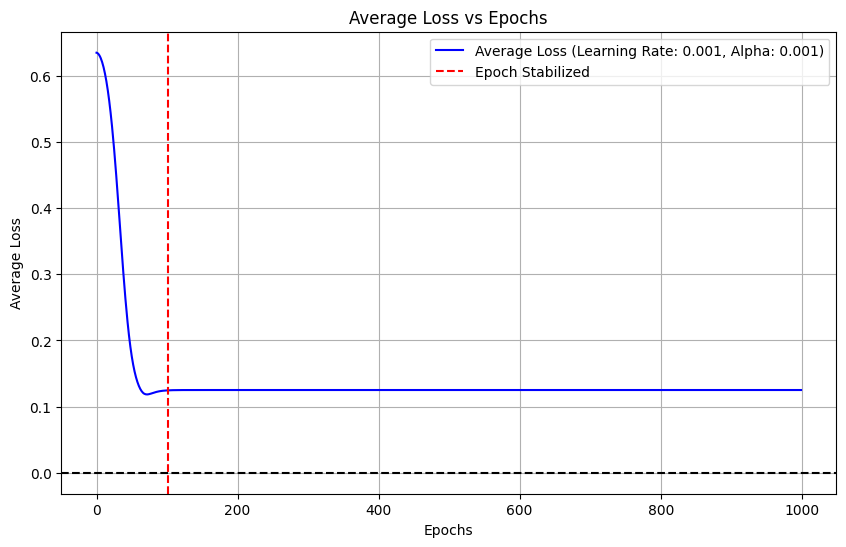

In [ ]:
#plot the loss
losses = nn.average_losses

plt.figure(figsize=(10, 6))
plt.plot(
    losses, label=f"Average Loss (Learning Rate: {ALPHA}, Alpha: {ALPHA})", color="blue"
)
plt.title("Average Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.legend()
plt.grid()
plt.axhline(y=0, color="black", linestyle="--")

if epoch_stabilized != -1:  
    plt.axvline(x=epoch_stabilized, color='red', linestyle='--', label='Epoch Stabilized')

plt.legend()
plt.show()
plt.show()

Epoch 1/1000, Loss: 0.5239280697092703
Epoch 2/1000, Loss: 0.523883022097288
Epoch 3/1000, Loss: 0.5237929205289799
Epoch 4/1000, Loss: 0.5236577519091398
Epoch 5/1000, Loss: 0.5234774966050528
Epoch 6/1000, Loss: 0.5232521285022712
Epoch 7/1000, Loss: 0.5229816150791406
Epoch 8/1000, Loss: 0.5226659175002216
Epoch 9/1000, Loss: 0.5223049907287767
Epoch 10/1000, Loss: 0.5218987836585334
Epoch 11/1000, Loss: 0.5214472392649636
Epoch 12/1000, Loss: 0.5209502947763526
Epoch 13/1000, Loss: 0.5204078818649625
Epoch 14/1000, Loss: 0.5198199268586255
Epoch 15/1000, Loss: 0.5191863509731328
Epoch 16/1000, Loss: 0.5185070705658061
Epoch 17/1000, Loss: 0.5177819974106769
Epoch 18/1000, Loss: 0.5170110389957097
Epoch 19/1000, Loss: 0.5161940988425398
Epoch 20/1000, Loss: 0.5153310768492069
Epoch 21/1000, Loss: 0.5144218696563915
Epoch 22/1000, Loss: 0.5134663710376716
Epoch 23/1000, Loss: 0.512464472314333
Epoch 24/1000, Loss: 0.5114160627952751
Epoch 25/1000, Loss: 0.5103210302425594
Epoch 26/10

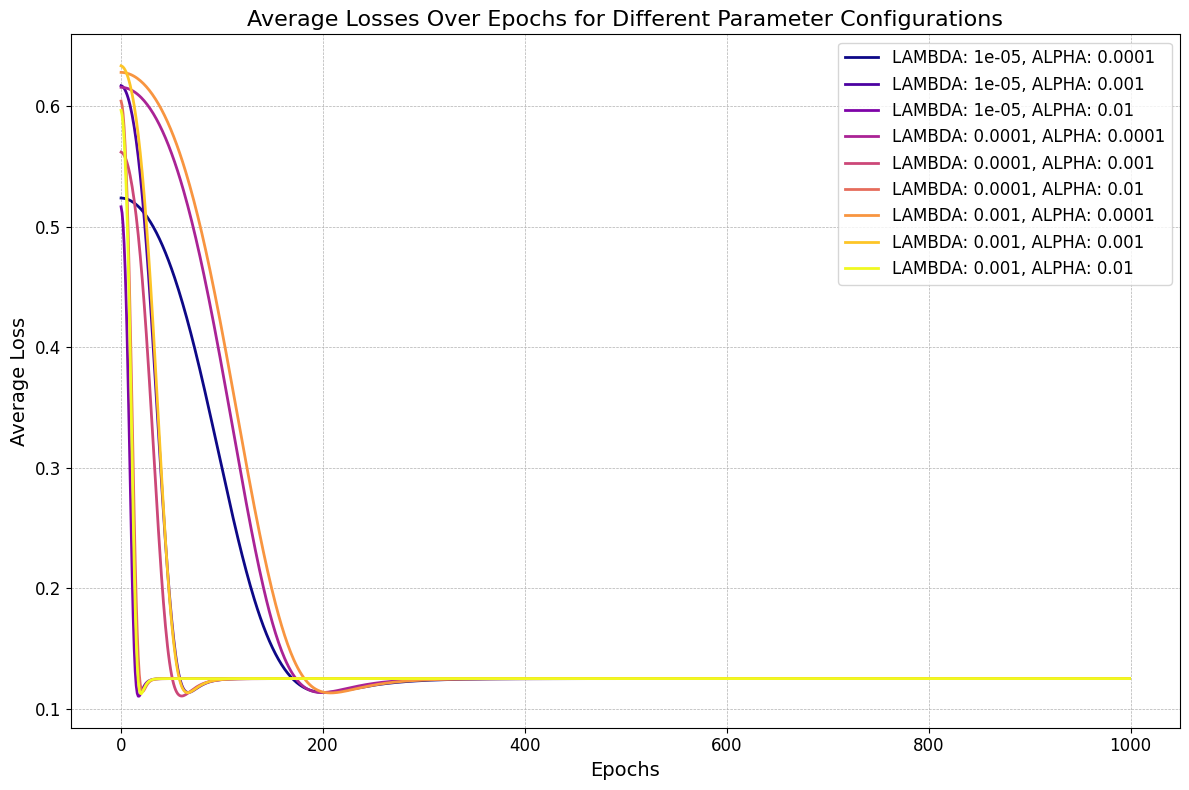

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_values = [0.00001, 0.0001, 0.001]
alpha_values = [0.0001, 0.001, 0.01]

num_configs = len(lambda_values) * len(alpha_values)
losses = dict()

for lambd in lambda_values:
    for alpha in alpha_values:
        nn = NeuralNetwork(alpha=alpha, lambd=lambd)
        nn.init_weights()
        nn.train(data)
        losses[lambd, alpha] = nn

plt.figure(figsize=(12, 8))
colors = plt.cm.plasma(np.linspace(0, 1, num_configs))  
i = 0

for lambd in lambda_values:
    for alpha in alpha_values:
        net: NeuralNetwork = losses[lambd, alpha] 
        plt.plot(net.average_losses, color=colors[i], linestyle='-', linewidth=2, label=f'LAMBDA: {lambd}, ALPHA: {alpha}')
        i += 1

plt.title('Average Losses Over Epochs for Different Parameter Configurations', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()  
plt.show()



Based on the trials conducted, the neural network demonstrates a faster convergence with the parameter configurations of \( lambda = 0.001 \) and \( alpha = 0.01 \). This indicates that these specific values for the regularization parameter and the learning rate are effective in facilitating the training process, allowing the network to achieve lower average losses more quickly compared to other configurations tested. 

**Optuna optimization**

[I 2024-11-03 20:32:23,417] A new study created in memory with name: no-name-43d3fe40-c9af-4144-bb5e-bda9b32bb92b
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_35496\4060888122.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
C:\Users\Aurora Pia Ghiardell\AppData\Local\Temp\ipykernel_35496\4060888122.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)


Epoch 1/1000, Loss: 0.6059623990479305
Epoch 2/1000, Loss: 0.6053893544518314
Epoch 3/1000, Loss: 0.6042404642202007
Epoch 4/1000, Loss: 0.6025100419927549
Epoch 5/1000, Loss: 0.6001895912290733
Epoch 6/1000, Loss: 0.5972678535860201
Epoch 7/1000, Loss: 0.5937308828658286
Epoch 8/1000, Loss: 0.5895621530556268
Epoch 9/1000, Loss: 0.5847427115366031
Epoch 10/1000, Loss: 0.5792513913169449
Epoch 11/1000, Loss: 0.5730650990982646
Epoch 12/1000, Loss: 0.566159199016972
Epoch 13/1000, Loss: 0.5585080148149233
Epoch 14/1000, Loss: 0.5500854756692428
Epoch 15/1000, Loss: 0.540865932472558
Epoch 16/1000, Loss: 0.5308251713344964
Epoch 17/1000, Loss: 0.5199416485962378
Epoch 18/1000, Loss: 0.5081979656371182
Epoch 19/1000, Loss: 0.49558259099735635
Epoch 20/1000, Loss: 0.4820918206496881
Epoch 21/1000, Loss: 0.4677319437025511
Epoch 22/1000, Loss: 0.4525215501404028
Epoch 23/1000, Loss: 0.4364938802777526
Epoch 24/1000, Loss: 0.41969907495764075
Epoch 25/1000, Loss: 0.4022061457463767
Epoch 26/

[I 2024-11-03 20:32:25,938] Trial 0 finished with value: 0.125 and parameters: {'lambda': 0.00018229754912392463, 'alpha': 0.001373717361226425}. Best is trial 0 with value: 0.125.


Epoch 932/1000, Loss: 0.125
Epoch 933/1000, Loss: 0.125
Epoch 934/1000, Loss: 0.125
Epoch 935/1000, Loss: 0.125
Epoch 936/1000, Loss: 0.125
Epoch 937/1000, Loss: 0.125
Epoch 938/1000, Loss: 0.125
Epoch 939/1000, Loss: 0.125
Epoch 940/1000, Loss: 0.125
Epoch 941/1000, Loss: 0.125
Epoch 942/1000, Loss: 0.125
Epoch 943/1000, Loss: 0.125
Epoch 944/1000, Loss: 0.125
Epoch 945/1000, Loss: 0.125
Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss: 0.125
Epoch 954/1000, Loss: 0.125
Epoch 955/1000, Loss: 0.125
Epoch 956/1000, Loss: 0.125
Epoch 957/1000, Loss: 0.125
Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss: 0.125
Epoch 967/1000, Loss

[I 2024-11-03 20:32:28,296] Trial 1 finished with value: 0.125 and parameters: {'lambda': 0.007577849315697378, 'alpha': 0.0005804727130506188}. Best is trial 0 with value: 0.125.


Epoch 936/1000, Loss: 0.125
Epoch 937/1000, Loss: 0.125
Epoch 938/1000, Loss: 0.125
Epoch 939/1000, Loss: 0.125
Epoch 940/1000, Loss: 0.125
Epoch 941/1000, Loss: 0.125
Epoch 942/1000, Loss: 0.125
Epoch 943/1000, Loss: 0.125
Epoch 944/1000, Loss: 0.125
Epoch 945/1000, Loss: 0.125
Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss: 0.125
Epoch 954/1000, Loss: 0.125
Epoch 955/1000, Loss: 0.125
Epoch 956/1000, Loss: 0.125
Epoch 957/1000, Loss: 0.125
Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss: 0.125
Epoch 967/1000, Loss: 0.125
Epoch 968/1000, Loss: 0.125
Epoch 969/1000, Loss: 0.125
Epoch 970/1000, Loss: 0.125
Epoch 971/1000, Loss

[I 2024-11-03 20:32:30,722] Trial 2 finished with value: 0.12499999999962484 and parameters: {'lambda': 0.0001051139424659811, 'alpha': 0.00013201323333147946}. Best is trial 2 with value: 0.12499999999962484.


Epoch 986/1000, Loss: 0.12499999999944483
Epoch 987/1000, Loss: 0.12499999999946018
Epoch 988/1000, Loss: 0.12499999999947507
Epoch 989/1000, Loss: 0.12499999999948959
Epoch 990/1000, Loss: 0.12499999999950367
Epoch 991/1000, Loss: 0.12499999999951739
Epoch 992/1000, Loss: 0.12499999999953071
Epoch 993/1000, Loss: 0.12499999999954367
Epoch 994/1000, Loss: 0.12499999999955626
Epoch 995/1000, Loss: 0.12499999999956851
Epoch 996/1000, Loss: 0.12499999999958043
Epoch 997/1000, Loss: 0.124999999999592
Epoch 998/1000, Loss: 0.12499999999960329
Epoch 999/1000, Loss: 0.12499999999961423
Epoch 1000/1000, Loss: 0.12499999999962484
Epoch 1/1000, Loss: 0.5883316867871267
Epoch 2/1000, Loss: 0.5863334712409128
Epoch 3/1000, Loss: 0.5823132971741165
Epoch 4/1000, Loss: 0.5762170559267866
Epoch 5/1000, Loss: 0.5679666593882867
Epoch 6/1000, Loss: 0.557464630215707
Epoch 7/1000, Loss: 0.5446014902304532
Epoch 8/1000, Loss: 0.5292669999300316
Epoch 9/1000, Loss: 0.5113663984035949
Epoch 10/1000, Loss: 

[I 2024-11-03 20:32:33,266] Trial 3 finished with value: 0.125 and parameters: {'lambda': 0.003576714040291686, 'alpha': 0.004771536909838104}. Best is trial 2 with value: 0.12499999999962484.


Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss: 0.125
Epoch 967/1000, Loss: 0.125
Epoch 968/1000, Loss: 0.125
Epoch 969/1000, Loss: 0.125
Epoch 970/1000, Loss: 0.125
Epoch 971/1000, Loss: 0.125
Epoch 972/1000, Loss: 0.125
Epoch 973/1000, Loss: 0.125
Epoch 974/1000, Loss: 0.125
Epoch 975/1000, Loss: 0.125
Epoch 976/1000, Loss: 0.125
Epoch 977/1000, Loss: 0.125
Epoch 978/1000, Loss: 0.125
Epoch 979/1000, Loss: 0.125
Epoch 980/1000, Loss: 0.125
Epoch 981/1000, Loss: 0.125
Epoch 982/1000, Loss: 0.125
Epoch 983/1000, Loss: 0.125
Epoch 984/1000, Loss: 0.125
Epoch 985/1000, Loss: 0.125
Epoch 986/1000, Loss: 0.125
Epoch 987/1000, Loss: 0.125
Epoch 988/1000, Loss: 0.125
Epoch 989/1000, Loss: 0.125
Epoch 990/1000, Loss: 0.125
Epoch 991/1000, Loss: 0.125
Epoch 992/1000, Loss: 0.125
Epoch 993/1000, Loss

[I 2024-11-03 20:32:35,802] Trial 4 finished with value: 0.125 and parameters: {'lambda': 0.001214029042060544, 'alpha': 0.0009064341335688831}. Best is trial 2 with value: 0.12499999999962484.


Epoch 931/1000, Loss: 0.125
Epoch 932/1000, Loss: 0.125
Epoch 933/1000, Loss: 0.125
Epoch 934/1000, Loss: 0.125
Epoch 935/1000, Loss: 0.125
Epoch 936/1000, Loss: 0.125
Epoch 937/1000, Loss: 0.125
Epoch 938/1000, Loss: 0.125
Epoch 939/1000, Loss: 0.125
Epoch 940/1000, Loss: 0.125
Epoch 941/1000, Loss: 0.125
Epoch 942/1000, Loss: 0.125
Epoch 943/1000, Loss: 0.125
Epoch 944/1000, Loss: 0.125
Epoch 945/1000, Loss: 0.125
Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss: 0.125
Epoch 954/1000, Loss: 0.125
Epoch 955/1000, Loss: 0.125
Epoch 956/1000, Loss: 0.125
Epoch 957/1000, Loss: 0.125
Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss

[I 2024-11-03 20:32:38,402] Trial 5 finished with value: 0.12499999999999967 and parameters: {'lambda': 0.053056749154896894, 'alpha': 0.0001555853728063187}. Best is trial 2 with value: 0.12499999999962484.


Epoch 919/1000, Loss: 0.12499999999999421
Epoch 920/1000, Loss: 0.1249999999999944
Epoch 921/1000, Loss: 0.12499999999999459
Epoch 922/1000, Loss: 0.12499999999999478
Epoch 923/1000, Loss: 0.12499999999999495
Epoch 924/1000, Loss: 0.12499999999999513
Epoch 925/1000, Loss: 0.1249999999999953
Epoch 926/1000, Loss: 0.12499999999999546
Epoch 927/1000, Loss: 0.12499999999999564
Epoch 928/1000, Loss: 0.12499999999999577
Epoch 929/1000, Loss: 0.12499999999999593
Epoch 930/1000, Loss: 0.12499999999999606
Epoch 931/1000, Loss: 0.1249999999999962
Epoch 932/1000, Loss: 0.12499999999999632
Epoch 933/1000, Loss: 0.12499999999999646
Epoch 934/1000, Loss: 0.12499999999999659
Epoch 935/1000, Loss: 0.1249999999999967
Epoch 936/1000, Loss: 0.12499999999999681
Epoch 937/1000, Loss: 0.12499999999999692
Epoch 938/1000, Loss: 0.12499999999999703
Epoch 939/1000, Loss: 0.12499999999999714
Epoch 940/1000, Loss: 0.12499999999999722
Epoch 941/1000, Loss: 0.12499999999999734
Epoch 942/1000, Loss: 0.12499999999999

[I 2024-11-03 20:32:40,862] Trial 6 finished with value: 0.125 and parameters: {'lambda': 0.00012631677177266584, 'alpha': 0.001953608962339066}. Best is trial 2 with value: 0.12499999999962484.


Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss: 0.125
Epoch 954/1000, Loss: 0.125
Epoch 955/1000, Loss: 0.125
Epoch 956/1000, Loss: 0.125
Epoch 957/1000, Loss: 0.125
Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss: 0.125
Epoch 967/1000, Loss: 0.125
Epoch 968/1000, Loss: 0.125
Epoch 969/1000, Loss: 0.125
Epoch 970/1000, Loss: 0.125
Epoch 971/1000, Loss: 0.125
Epoch 972/1000, Loss: 0.125
Epoch 973/1000, Loss: 0.125
Epoch 974/1000, Loss: 0.125
Epoch 975/1000, Loss: 0.125
Epoch 976/1000, Loss: 0.125
Epoch 977/1000, Loss: 0.125
Epoch 978/1000, Loss: 0.125
Epoch 979/1000, Loss: 0.125
Epoch 980/1000, Loss: 0.125
Epoch 981/1000, Loss

[I 2024-11-03 20:32:43,465] Trial 7 finished with value: 0.125 and parameters: {'lambda': 0.08585311708600167, 'alpha': 0.000984509188358786}. Best is trial 2 with value: 0.12499999999962484.


Epoch 942/1000, Loss: 0.125
Epoch 943/1000, Loss: 0.125
Epoch 944/1000, Loss: 0.125
Epoch 945/1000, Loss: 0.125
Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss: 0.125
Epoch 954/1000, Loss: 0.125
Epoch 955/1000, Loss: 0.125
Epoch 956/1000, Loss: 0.125
Epoch 957/1000, Loss: 0.125
Epoch 958/1000, Loss: 0.125
Epoch 959/1000, Loss: 0.125
Epoch 960/1000, Loss: 0.125
Epoch 961/1000, Loss: 0.125
Epoch 962/1000, Loss: 0.125
Epoch 963/1000, Loss: 0.125
Epoch 964/1000, Loss: 0.125
Epoch 965/1000, Loss: 0.125
Epoch 966/1000, Loss: 0.125
Epoch 967/1000, Loss: 0.125
Epoch 968/1000, Loss: 0.125
Epoch 969/1000, Loss: 0.125
Epoch 970/1000, Loss: 0.125
Epoch 971/1000, Loss: 0.125
Epoch 972/1000, Loss: 0.125
Epoch 973/1000, Loss: 0.125
Epoch 974/1000, Loss: 0.125
Epoch 975/1000, Loss: 0.125
Epoch 976/1000, Loss: 0.125
Epoch 977/1000, Loss

[I 2024-11-03 20:32:46,055] Trial 8 finished with value: 0.12499999999691044 and parameters: {'lambda': 0.06847619919572202, 'alpha': 0.00011100994187827223}. Best is trial 8 with value: 0.12499999999691044.


Epoch 961/1000, Loss: 0.12499999999157271
Epoch 962/1000, Loss: 0.124999999991787
Epoch 963/1000, Loss: 0.12499999999199585
Epoch 964/1000, Loss: 0.12499999999219932
Epoch 965/1000, Loss: 0.12499999999239766
Epoch 966/1000, Loss: 0.12499999999259093
Epoch 967/1000, Loss: 0.12499999999277928
Epoch 968/1000, Loss: 0.12499999999296282
Epoch 969/1000, Loss: 0.1249999999931417
Epoch 970/1000, Loss: 0.12499999999331601
Epoch 971/1000, Loss: 0.1249999999934859
Epoch 972/1000, Loss: 0.12499999999365144
Epoch 973/1000, Loss: 0.12499999999381277
Epoch 974/1000, Loss: 0.12499999999396999
Epoch 975/1000, Loss: 0.12499999999412323
Epoch 976/1000, Loss: 0.12499999999427254
Epoch 977/1000, Loss: 0.12499999999441805
Epoch 978/1000, Loss: 0.12499999999455987
Epoch 979/1000, Loss: 0.12499999999469806
Epoch 980/1000, Loss: 0.12499999999483272
Epoch 981/1000, Loss: 0.124999999994964
Epoch 982/1000, Loss: 0.1249999999950919
Epoch 983/1000, Loss: 0.12499999999521656
Epoch 984/1000, Loss: 0.12499999999533806

[I 2024-11-03 20:32:48,535] Trial 9 finished with value: 0.125 and parameters: {'lambda': 0.00011052324749574854, 'alpha': 0.000274832642073905}. Best is trial 8 with value: 0.12499999999691044.


Epoch 918/1000, Loss: 0.125
Epoch 919/1000, Loss: 0.125
Epoch 920/1000, Loss: 0.125
Epoch 921/1000, Loss: 0.125
Epoch 922/1000, Loss: 0.125
Epoch 923/1000, Loss: 0.125
Epoch 924/1000, Loss: 0.125
Epoch 925/1000, Loss: 0.125
Epoch 926/1000, Loss: 0.125
Epoch 927/1000, Loss: 0.125
Epoch 928/1000, Loss: 0.125
Epoch 929/1000, Loss: 0.125
Epoch 930/1000, Loss: 0.125
Epoch 931/1000, Loss: 0.125
Epoch 932/1000, Loss: 0.125
Epoch 933/1000, Loss: 0.125
Epoch 934/1000, Loss: 0.125
Epoch 935/1000, Loss: 0.125
Epoch 936/1000, Loss: 0.125
Epoch 937/1000, Loss: 0.125
Epoch 938/1000, Loss: 0.125
Epoch 939/1000, Loss: 0.125
Epoch 940/1000, Loss: 0.125
Epoch 941/1000, Loss: 0.125
Epoch 942/1000, Loss: 0.125
Epoch 943/1000, Loss: 0.125
Epoch 944/1000, Loss: 0.125
Epoch 945/1000, Loss: 0.125
Epoch 946/1000, Loss: 0.125
Epoch 947/1000, Loss: 0.125
Epoch 948/1000, Loss: 0.125
Epoch 949/1000, Loss: 0.125
Epoch 950/1000, Loss: 0.125
Epoch 951/1000, Loss: 0.125
Epoch 952/1000, Loss: 0.125
Epoch 953/1000, Loss

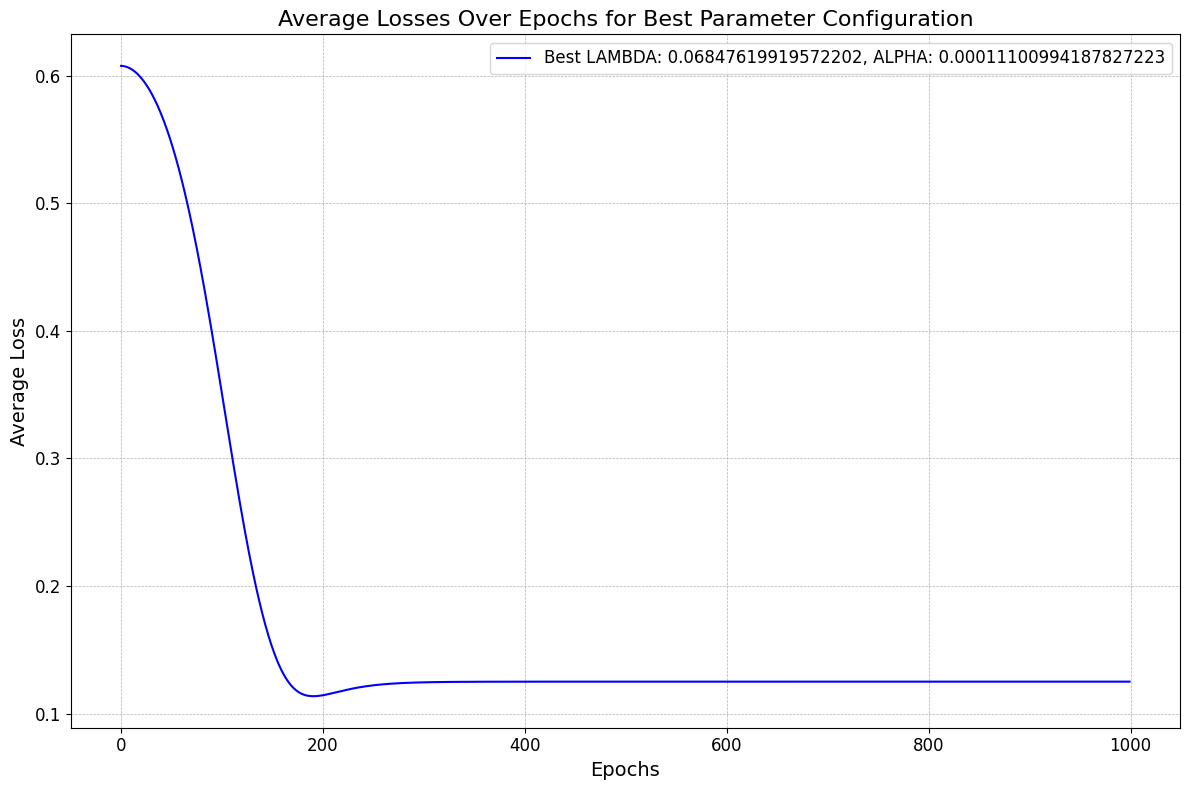

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import optuna


def objective(trial):
    lambd = trial.suggest_loguniform('lambda', 1e-5, 1e-1)
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-2)

    nn = NeuralNetwork(alpha=alpha, lambd=lambd)
    nn.init_weights()
    nn.train(data)  

    return nn.average_losses[-1] 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10) 

print(f"Best parameters: {study.best_params}")
print(f"Best loss: {study.best_value}")

best_params = study.best_params
best_nn = NeuralNetwork(alpha=best_params['alpha'], lambd=best_params['lambda'])
best_nn.init_weights()
best_nn.train(data)

plt.figure(figsize=(12, 8))
plt.plot(best_nn.average_losses, color='blue', label=f'Best LAMBDA: {best_params["lambda"]}, ALPHA: {best_params["alpha"]}')
plt.title('Average Losses Over Epochs for Best Parameter Configuration', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Average Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Activation Interpretation

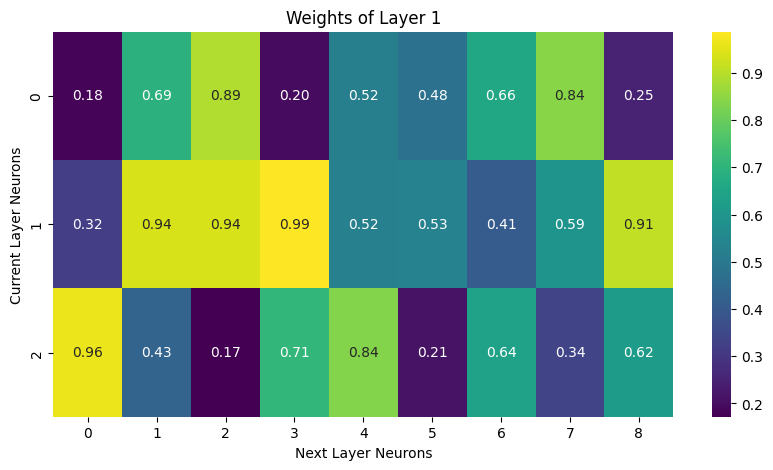

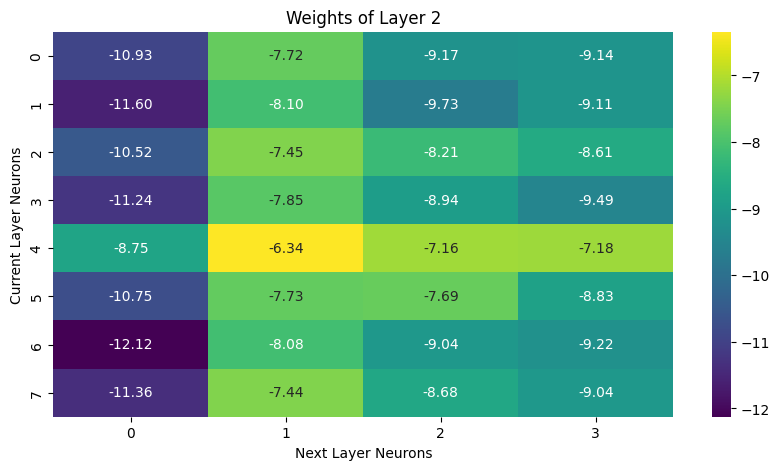

KeyboardInterrupt: 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weights = best_nn.weights 
activations = best_nn.activations 

def plot_weights(weights):
    for i, weight_matrix in enumerate(weights):
        plt.figure(figsize=(10, 5))
        sns.heatmap(weight_matrix, cmap='viridis', annot=True, fmt=".2f")
        plt.title(f'Weights of Layer {i+1}')
        plt.xlabel('Next Layer Neurons')
        plt.ylabel('Current Layer Neurons')
        plt.show()

plot_weights(weights)

print(activations)
